In [2]:
import matplotlib.pyplot as plt
from gensim.models import Word2Vec, KeyedVectors
import numpy as np
from itertools import product
from tqdm import tqdm
import sys
sys.path.append('../src')
from models import open_pickle

In [1]:
MODEL_NAME = 'glove_840B'
we_model_load = KeyedVectors.load(f'../data/interim/{MODEL_NAME}_norm', mmap='r')
RESULTS_FILEPATH = f'../data/interim/{MODEL_NAME}_association_metric_exps.pickle'
EXPERIMENT_DEFINITION_FILEPATH = f'../data/interim/{MODEL_NAME}_experiment_definitions.pickle'
IMAGE_SAVE_FILEPATH = f'../reports/figures/{MODEL_NAME}_exp_results.png'
NONRELATIVE_IMAGE_SAVE_FILEPATH = f'../reports/figures/{MODEL_NAME}_nonrelative_exp_results.png'

exp_def_dict = open_pickle(EXPERIMENT_DEFINITION_FILEPATH)
results_dict = open_pickle(RESULTS_FILEPATH)

NameError: name 'open_pickle' is not defined

In [5]:
results_dict[2]['second']

{'X_array': array([0.02112871, 0.10340279, 0.09794074, 0.03156099, 0.06695956,
        0.08279988, 0.08799821, 0.07756364, 0.09256029, 0.0854587 ,
        0.02969325, 0.03033215, 0.09486365, 0.04832196, 0.06213605,
        0.07350785, 0.04589254, 0.04254091, 0.14756882, 0.07185456,
        0.04977226, 0.13195184, 0.04830742, 0.07840472], dtype=float32),
 'Y_array': array([ 0.13220632, -0.08497709, -0.10385516, -0.02845621, -0.07789075,
        -0.04371208, -0.09026426, -0.03039348, -0.0064081 ,  0.00885332,
        -0.05281079, -0.11493045, -0.01990819, -0.02996206, -0.16547555,
        -0.11600381, -0.02762115, -0.0789417 , -0.15496811, -0.01919436,
        -0.13672858, -0.04515535, -0.02813044, -0.00747687], dtype=float32),
 'X_mean': 0.0709384,
 'Y_mean': -0.055091873,
 'threshold': 0.43816024,
 'sigtest_dist_1': array([-0.00821654, -0.00048073, -0.00709439, ..., -0.00225418,
        -0.00324991,  0.00674795], dtype=float32),
 'sigtest_dist_2': array([0.06665704, 0.07997904, 0.07273

In [6]:
def add_axes_obj_labels(ax, exp_num, target_label, A_label, B_label, n_samples):
    TITLE_FONT_SIZE = 12
    [target_label, A_label, B_label] = [s.upper() for s in [target_label, A_label, B_label]]
    ax.set_title(f'#{exp_num}: {target_label} terms: {B_label} (left) vs. {A_label} (right)',
                fontsize=TITLE_FONT_SIZE)
    ax.set_xlabel(f'Bias Regions: CI with {n_samples} samples')
    ax.set_ylabel(f'Word')
    ax.yaxis.set_ticklabels([])

In [7]:
def annotate_points(ax, terms, x_array, y):
    POINT_FONT_SIZE = 9
    for i, txt in enumerate(terms):
        ax.annotate(txt, (x_array[i], y[i]), fontsize=POINT_FONT_SIZE)

In [8]:
def add_scatters_and_lines(ax, arr_second, threshold_second,
                   mean_second, pct_5_second, pct_95_second, lower_bound, upper_bound, 
                           ST1_80CI, ST2_90CI, ST3_90CI, y):
    S = 20 # Marker size
    ZERO_LINE_COLOR = 'lime'
    SECOND_ORDER_COLOR = 'red'
    SECOND_ORDER_PERCENTILES_COLOR = 'blue'
    SHADE_DARKNESS = 0.2
    SHADE_DARKNESS_80CI = 0.1
    SHADE_DARKNESS_90CI = 0.15
    SHADE_DARKNESS_95CI = 0.25
    CI_COLOR = 'black'
    XAXIS_LIMIT = 0.6
    
    y = [i for i in range(1,len(arr_second)+1)]
    ax.scatter(arr_second, y, c=SECOND_ORDER_COLOR, s=S)
    ax.xaxis.grid()
    #ax.axvline(threshold_second, color=SECOND_ORDER_COLOR, linestyle='-.', label='second-order threshold')
    #ax.axvline(-threshold_second, color=SECOND_ORDER_COLOR, linestyle='-.')
    #ax.axvline(mean_second, c=SECOND_ORDER_COLOR, label='second-order mean')
    #ax.axvspan(lower_bound, upper_bound, alpha=SHADE_DARKNESS, color=SECOND_ORDER_PERCENTILES_COLOR)
    #ax.axvspan(ST1_80CI[0], ST1_80CI[1], alpha=SHADE_DARKNESS_80CI, color=CI_COLOR)
    #ax.axvspan(ST1_90CI[0], ST1_90CI[1], alpha=SHADE_DARKNESS_90CI, color=CI_COLOR)
    #ax.axvspan(ST1_95CI[0], ST1_95CI[1], alpha=SHADE_DARKNESS_95CI, color=CI_COLOR)
    #ax.axvspan(pct_5_second, pct_95_second, alpha=SHADE_DARKNESS, color=SECOND_ORDER_PERCENTILES_COLOR)
    ax.set_xlim(-XAXIS_LIMIT, XAXIS_LIMIT)

100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 104.84it/s]
No handles with labels found to put in legend.


Rendering...


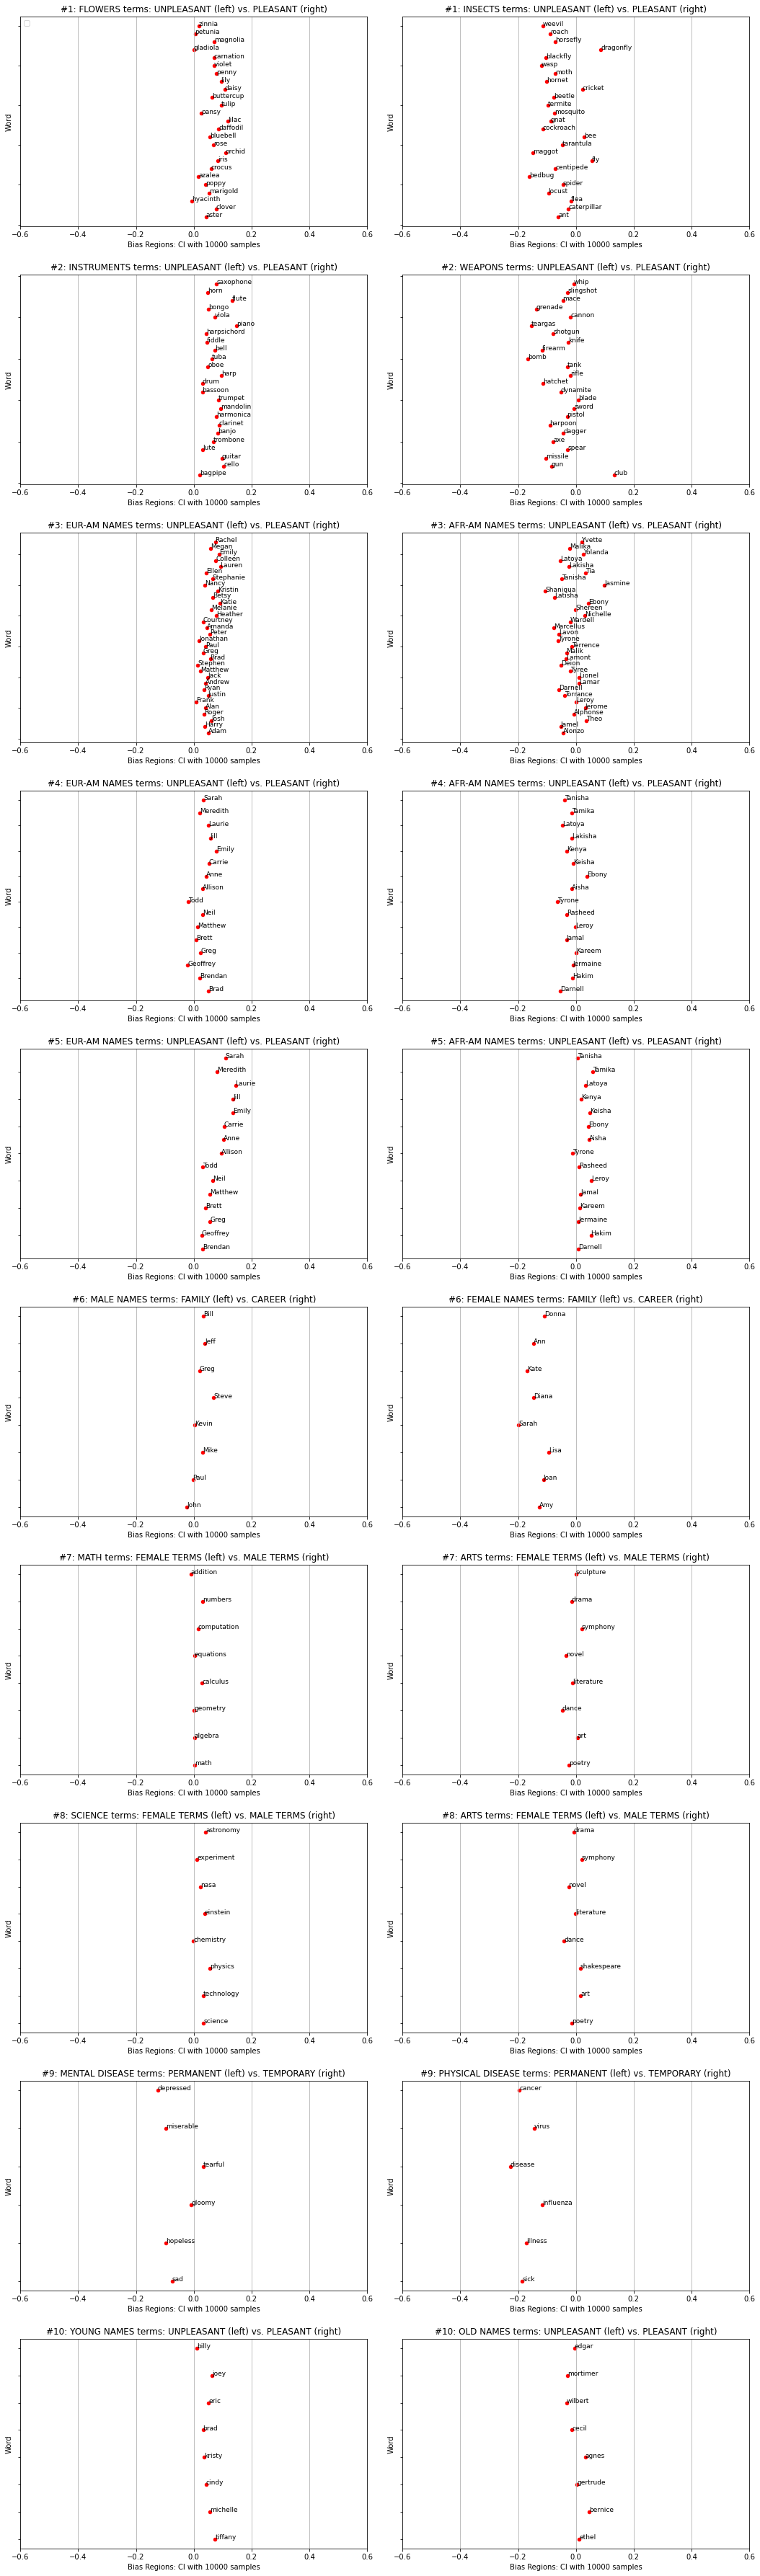

In [9]:
fig, axs = plt.subplots(10,2, figsize=(15,50))
LEGEND_SIZE = 10

exps = range(1,11)
target_letters = ['X','Y']
for exp_num, target_letter in tqdm(product(exps, target_letters), total=20):
    col = 0 if target_letter =='X' else 1
    ax = axs[exp_num-1, col]
    
    arr_second = results_dict[exp_num]['second'][f'{target_letter}_array']
    threshold_second = results_dict[exp_num]['second']['threshold']
    mean_second = results_dict[exp_num]['second'][f'{target_letter}_mean']
    pct_5_second = None # results_dict[exp_num]['second']['pct_5']
    pct_95_second = None # results_dict[exp_num]['second']['pct_95']
    lower_bound = None #results_dict[exp_num]['second']['lower_bound']
    upper_bound = None #results_dict[exp_num]['second']['upper_bound']
    ST1_80CI = None #results_dict[exp_num]['second']['ST1_80CI']
    ST1_90CI = None #results_dict[exp_num]['second']['ST1_90CI']
    ST1_95CI = None #results_dict[exp_num]['second']['ST1_95CI']
    n_samples = len(results_dict[exp_num]['second']['sigtest_dist_1'])
    y = [i for i in range(1,len(arr_second)+1)]
    terms = exp_def_dict[exp_num][f'{target_letter}_terms']
    target_label = exp_def_dict[exp_num][f'{target_letter}_label']
    A_label = exp_def_dict[exp_num]['A_label']
    B_label = exp_def_dict[exp_num]['B_label']
    
    
    add_scatters_and_lines(ax, arr_second, threshold_second,
                   mean_second, pct_5_second, pct_95_second, lower_bound, upper_bound, 
                           ST1_80CI, ST1_90CI, ST1_95CI, y)
    annotate_points(ax, terms, arr_second, y)
    add_axes_obj_labels(ax, exp_num, target_label, A_label, B_label, n_samples)
axs[0,0].legend(loc=2, prop={'size': LEGEND_SIZE})
fig.tight_layout(pad=2)
print('Rendering...')
plt.savefig(IMAGE_SAVE_FILEPATH)
plt.show()